In [82]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv("Resources/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [85]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [86]:
# Drop unwanted columns
cols_to_drop = ["Unnamed: 0", "track_id","artists" ,"album_name","track_name",'track_genre',"duration_ms","explicit"]
df = df.drop(columns=cols_to_drop)
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [87]:
# finding the max and min of danceability so that we can see how to bin it.
print(df['danceability'].min())  
print(df['danceability'].max())

0.0
0.985


In [88]:
# We will first define the bins and labels
bins = [0.0, 0.33, 0.66, 1.0]
labels = ['Low', 'Medium', 'High']

# Then we Apply the  binning to the popularity column
df['danceability'] = pd.cut(df['danceability'], bins=bins, labels=labels, right=True, include_lowest=True)

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric features (excluding danceability, which is already binned)
numeric_features = ["popularity","energy", "loudness", "speechiness", "acousticness", 
                    "instrumentalness", "liveness", "valence", "tempo"]

# Define categorical features (one-hot encoded music category columns)
categorical_features = ['key', 'mode', 'time_signature']

# Define preprocessing for numeric features (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformations for numeric and categorical features into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [90]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)
# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + 
                         list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)))

# Convert preprocessed data to a DataFrame
df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final['danceability'] = df.danceability
df_final.head()

,popularity,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,danceability
0,1.782627,-0.717148,0.300828,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,High
1,0.975633,-1.889980,-1.784744,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Medium
2,1.065299,-1.122669,-0.293288,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Medium
3,1.692961,-2.312994,-2.039252,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Low
4,2.186125,-0.788711,-0.282750,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Medium


In [91]:
#mapping the values of low medium high to 0,1,2
df_final['danceability'] = df_final['danceability'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [92]:
corrs = df_final.corr()
corrs

,popularity,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,danceability
popularity,1.000000,0.001056,0.050423,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,-0.011589,-0.000555,0.017225,-0.001668,0.018452,-0.004126,0.004251,-0.010711,-0.003296,-0.006175,-0.009217,0.008664,0.013931,-0.013931,0.006340,-0.017323,-0.047090,0.056309,-0.025513,0.029600
energy,0.001056,1.000000,0.761690,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,-0.046043,0.053042,-0.032077,-0.050881,-0.007038,-0.029221,0.038098,-0.008281,0.022381,0.001266,-0.000214,0.054080,0.078362,-0.078362,-0.076559,-0.067013,-0.223207,0.258316,-0.078793,0.110578
loudness,0.050423,0.761690,1.000000,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,-0.030883,0.024506,-0.026624,-0.035176,-0.002140,-0.012613,0.030747,-0.009570,0.029584,-0.000558,-0.011172,0.043168,0.041764,-0.041764,-0.102131,-0.085221,-0.204889,0.256533,-0.093105,0.217343
speechiness,-0.044927,0.142509,0.060826,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.043286,0.059511,-0.024768,-0.006171,-0.012113,-0.015689,0.031393,-0.016754,0.017683,-0.008604,0.013714,0.017380,0.046532,-0.046532,-0.029505,0.036519,0.029632,-0.077745,0.108990,0.082824
acousticness,-0.025472,-0.733906,-0.589803,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,0.040239,-0.062792,0.034255,0.056270,0.010469,0.033459,-0.044137,0.006865,-0.024800,0.006700,0.013562,-0.061704,-0.095553,0.095553,0.021041,0.076849,0.226424,-0.257138,0.078421,-0.151686
instrumentalness,-0.095139,-0.181879,-0.433477,-0.089616,0.104027,1.000000,-0.079893,-0.324312,-0.050330,-0.009295,0.023447,0.000736,0.011864,-0.014271,-0.002500,0.003955,0.005419,-0.007196,-0.018073,0.019990,-0.007909,0.049955,-0.049955,0.058855,0.045382,0.068815,-0.095803,0.035309,-0.145120
liveness,-0.005387,0.184796,0.076899,0.205219,-0.020700,-0.079893,1.000000,0.019086,0.000600,-0.003383,-0.011063,0.016939,-0.017783,0.021210,0.002797,-0.011661,0.012318,-0.029585,0.011875,-0.009681,0.003374,-0.014012,0.014012,0.045302,0.015811,-0.000941,-0.011769,0.005756,-0.125515
valence,-0.040534,0.258934,0.279848,0.036635,-0.107070,-0.324312,0.019086,1.000000,0.078273,0.016132,-0.034142,-0.021274,-0.021840,-0.016683,0.011238,-0.000456,0.002447,0.005698,0.025369,0.005716,0.019902,-0.021953,0.021953,-0.067189,-0.050304,-0.149361,0.177264,-0.054761,0.420673
tempo,0.013205,0.247851,0.212446,0.017273,-0.208224,-0.050330,0.000600,0.078273,1.000000,-0.007891,0.012506,-0.006184,-0.023742,0.004493,-0.027403,0.012833,0.007573,0.006321,0.016710,-0.007558,0.002947,-0.000566,0.000566,-0.148561,-0.043120,0.002493,0.044535,-0.038591,-0.046498
key_0,-0.011589,-0.046043,-0.030883,-0.043286,0.040239,-0.009295,-0.003383,0.016132,-0.007891,1.000000,-0.116201,-0.121326,-0.064677,-0.105365,-0.107634,-0.098296,-0.130422,-0.094501,-0.119396,-0.095158,-0.107095,-0.107134,0.107134,-0.001221,-0.003137,0.011785,-0.010366,0.002588,-0.008327


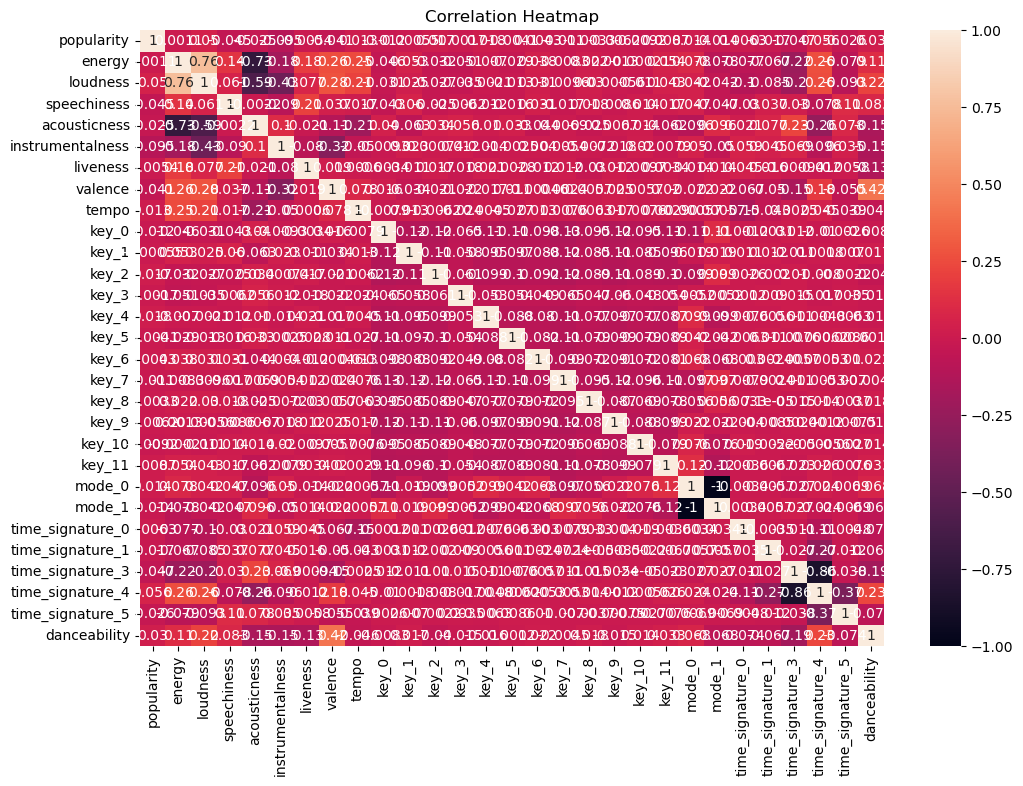

In [93]:
#plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [94]:
df.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,High,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,Medium,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,Medium,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,Low,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,Medium,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [95]:
# Step 1: Get the Data
X = df.drop(columns=["danceability"])
y = df.danceability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,) 
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(114000, 12)
(85500, 12)
(28500, 12)


In [96]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # For multi-class, we need to binarize the labels for ROC AUC
    y_train_bin = label_binarize(y_train, classes=model.classes_)
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    
    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    
    # Multi-class AUC - compute AUC for each class
    train_auc = roc_auc_score(y_train_bin, model.predict_proba(X_train), multi_class="ovr")
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)
    
    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    
    # Multi-class AUC - compute AUC for each class
    test_auc = roc_auc_score(y_test_bin, model.predict_proba(X_test), multi_class="ovr")
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=model.classes_, 
                yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    # Plot ROC curve for each class in a multi-class problem
    plt.figure(figsize=(6, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test)[:, i])
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc_score(y_test_bin[:, i], model.predict_proba(X_test)[:, i]):.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()


TRAIN METRICS
    Confusion Matrix: 
    [[13120   106 14387]
 [  225  2241  6195]
 [ 7009   977 41240]]
    
    AUC: 0.7834627434542778

    Classification Report:
                  precision    recall  f1-score   support

        High       0.64      0.48      0.55     27613
         Low       0.67      0.26      0.37      8661
      Medium       0.67      0.84      0.74     49226

    accuracy                           0.66     85500
   macro avg       0.66      0.52      0.55     85500
weighted avg       0.66      0.66      0.64     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 4363    39  4747]
 [   85   742  2159]
 [ 2350   290 13725]]
    
    AUC: 0.7866180512333197

    Classification Report:
                  precision    recall  f1-score   support

        High       0.64      0.48      0.55      9149
         Low       0.69      0.25      0.37      2986
      Medium       0.67      0.84      0.74     16365

    accuracy                           0.66     28500
   

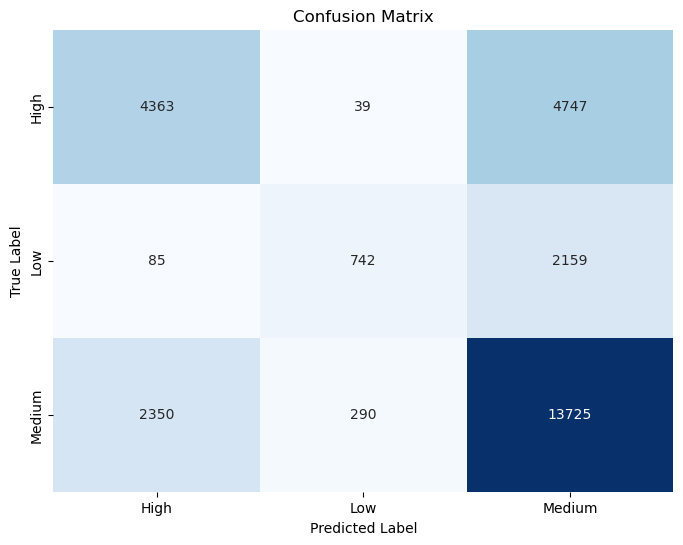

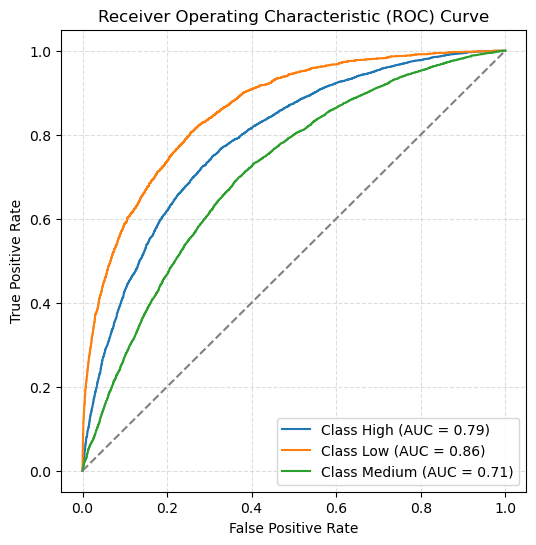

In [97]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[27613     0     0]
 [    0  8661     0]
 [    0     0 49226]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

        High       1.00      1.00      1.00     27613
         Low       1.00      1.00      1.00      8661
      Medium       1.00      1.00      1.00     49226

    accuracy                           1.00     85500
   macro avg       1.00      1.00      1.00     85500
weighted avg       1.00      1.00      1.00     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 7080    13  2056]
 [   25  1788  1173]
 [ 1246   263 14856]]
    
    AUC: 0.9413151721041958

    Classification Report:
                  precision    recall  f1-score   support

        High       0.85      0.77      0.81      9149
         Low       0.87      0.60      0.71      2986
      Medium       0.82      0.91      0.86     16365

    accuracy                           0.83     28500
   macro avg      

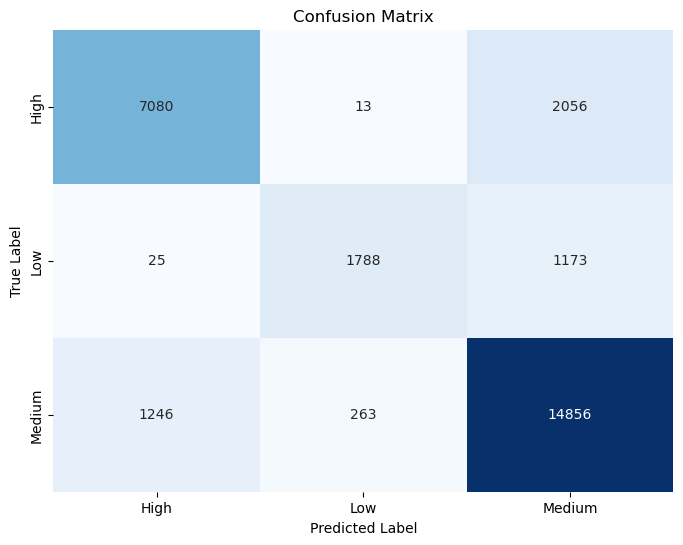

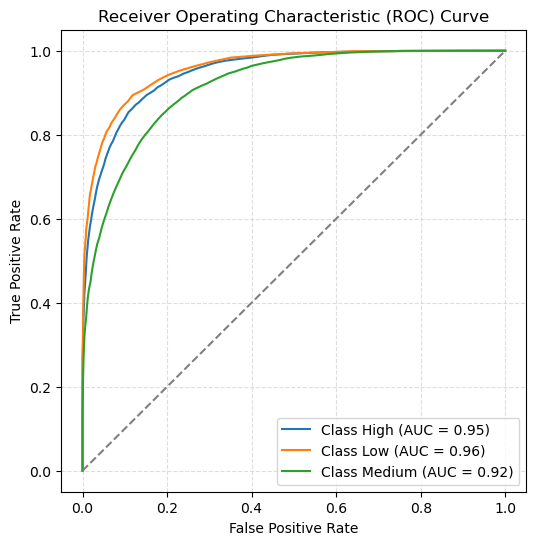

In [98]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[17179   126 10308]
 [  162  3829  4670]
 [ 8206  2428 38592]]
    
    AUC: 0.7912807387562265

    Classification Report:
                  precision    recall  f1-score   support

        High       0.67      0.62      0.65     27613
         Low       0.60      0.44      0.51      8661
      Medium       0.72      0.78      0.75     49226

    accuracy                           0.70     85500
   macro avg       0.66      0.62      0.64     85500
weighted avg       0.69      0.70      0.69     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 5656    51  3442]
 [   65  1337  1584]
 [ 2715   744 12906]]
    
    AUC: 0.791021618296142

    Classification Report:
                  precision    recall  f1-score   support

        High       0.67      0.62      0.64      9149
         Low       0.63      0.45      0.52      2986
      Medium       0.72      0.79      0.75     16365

    accuracy                           0.70     28500
   m

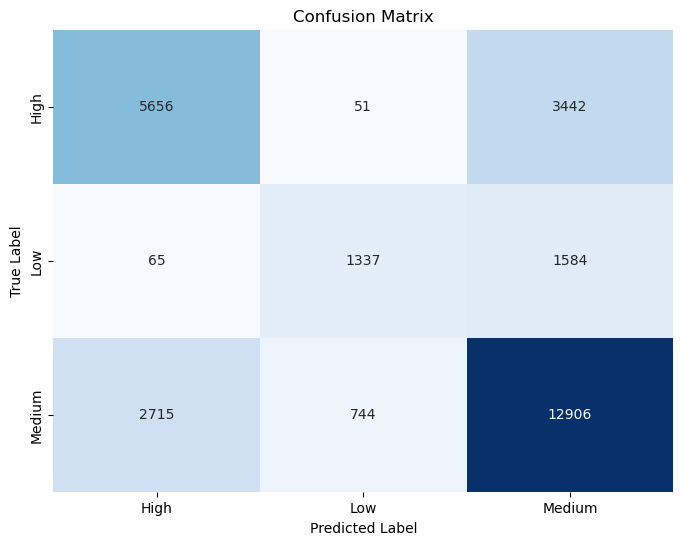

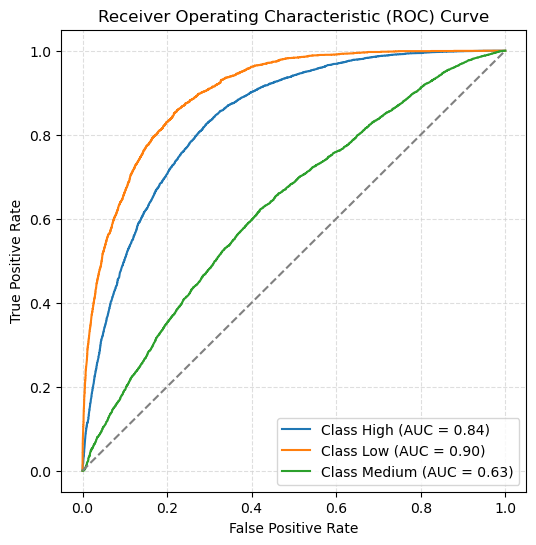

In [99]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[18283    62  9268]
 [  104  3712  4845]
 [ 6322  1063 41841]]
    
    AUC: 0.8719503980163655

    Classification Report:
                  precision    recall  f1-score   support

        High       0.74      0.66      0.70     27613
         Low       0.77      0.43      0.55      8661
      Medium       0.75      0.85      0.80     49226

    accuracy                           0.75     85500
   macro avg       0.75      0.65      0.68     85500
weighted avg       0.75      0.75      0.74     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 5982    30  3137]
 [   44  1249  1693]
 [ 2133   364 13868]]
    
    AUC: 0.8675352818073714

    Classification Report:
                  precision    recall  f1-score   support

        High       0.73      0.65      0.69      9149
         Low       0.76      0.42      0.54      2986
      Medium       0.74      0.85      0.79     16365

    accuracy                           0.74     28500
   

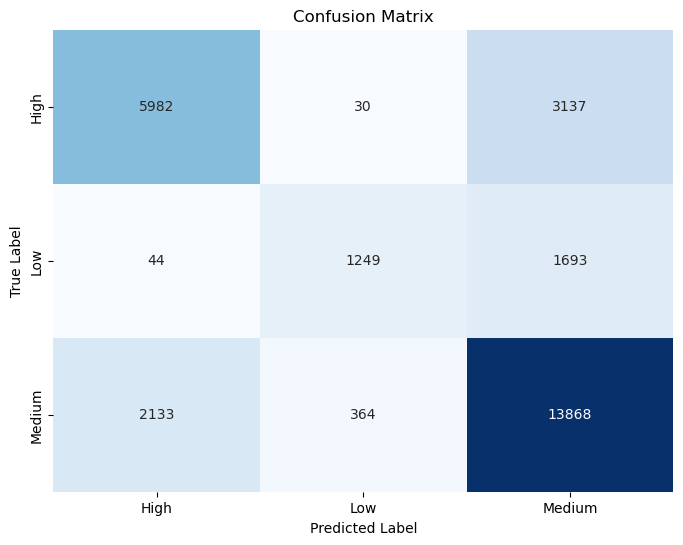

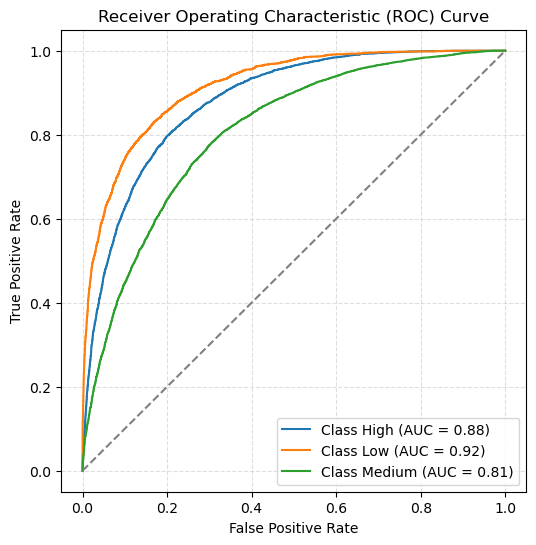

In [101]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[19887    46  7680]
 [   99  4626  3936]
 [ 5474   985 42767]]
    
    AUC: 0.9127782735566777

    Classification Report:
                  precision    recall  f1-score   support

        High       0.78      0.72      0.75     27613
         Low       0.82      0.53      0.65      8661
      Medium       0.79      0.87      0.83     49226

    accuracy                           0.79     85500
   macro avg       0.80      0.71      0.74     85500
weighted avg       0.79      0.79      0.78     85500

    
TEST METRICS
    Confusion Matrix: 
    [[ 6366    24  2759]
 [   37  1481  1468]
 [ 1992   405 13968]]
    
    AUC: 0.8942835902806459

    Classification Report:
                  precision    recall  f1-score   support

        High       0.76      0.70      0.73      9149
         Low       0.78      0.50      0.60      2986
      Medium       0.77      0.85      0.81     16365

    accuracy                           0.77     28500
   

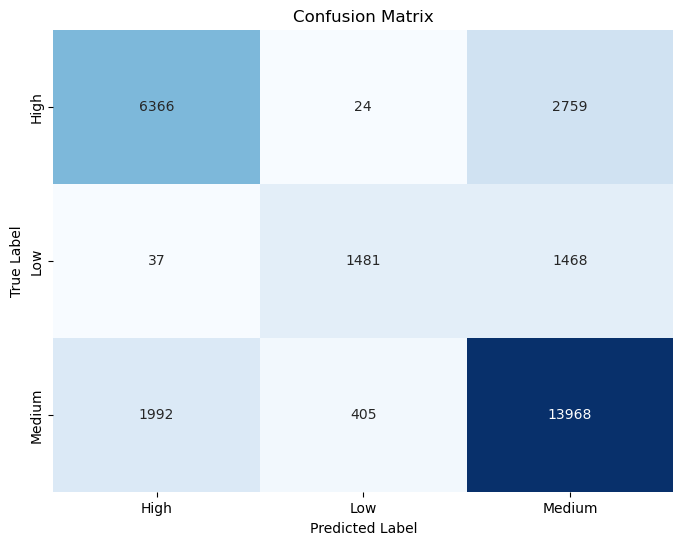

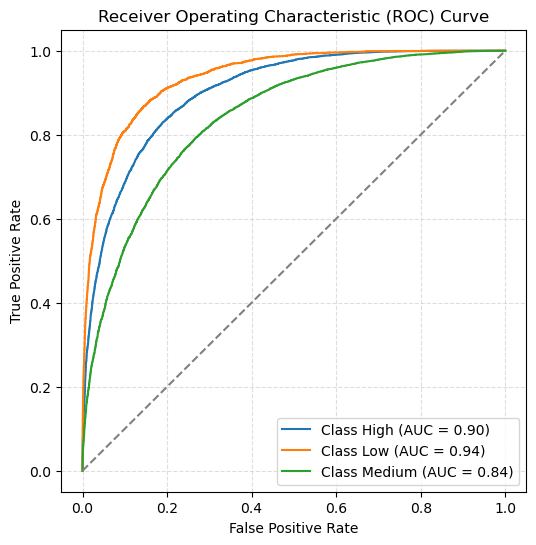

In [102]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [103]:
# Create a pipeline with a preprocessor and logistic regression model
lr = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression())  # Logistic Regression model
])

# Perform 5-fold cross-validation with roc_auc_ovr scoring for multi-class problems
cv = StratifiedKFold(n_splits=5)

cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc_ovr')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")


Cross-validation AUC scores: [0.78202305 0.76481897 0.77327344 0.78241292 0.78583014]
Mean AUC: 0.778


In [104]:
# Create a pipeline with a preprocessor and LightGBM model
lgbm = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))  # LightGBM classifier
])

# Perform 5-fold cross-validation with roc_auc_ovr scoring for multi-class classification
cv = StratifiedKFold(n_splits=5)

cv_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='roc_auc_ovr')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")


Cross-validation AUC scores: [0.8838561  0.87676837 0.87162605 0.89344772 0.86793699]
Mean AUC: 0.879


Model Productalisation

In [105]:
# Retrain the model on the ENTIRE dataset
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])
lgbm.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('classifier', LGBMClassifier(random_state=42, verbose=-1))])

In [106]:
# Save off my models
import pickle

# Model
pickle.dump(gb, open("danceability_model_pipeline.h5", 'wb'))